# Model Development



# Setup


We will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

In [ ]:
import piplite
await piplite.install('seaborn')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

<ipython-input-2-c5c9fedd4c6a>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Importing the dataset
Run the cell below to download the dataset into this environment.

This function will download the dataset into your browser


In [ ]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

We put the file path along with a quotation mark so that pandas will read the file into a dataframe from that address. The file path can be either an URL or your local file address.


In [ ]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

You will need to download the dataset using the download() function:


In [ ]:
#you will need to download the dataset;
await download(path, "laptops.csv")
file_name="laptops.csv"

Load the dataset into a pandas dataframe


In [ ]:
df = pd.read_csv(file_name, header=0)

In [ ]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [ ]:
# Write your code below and press Shift+Enter to execute 
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


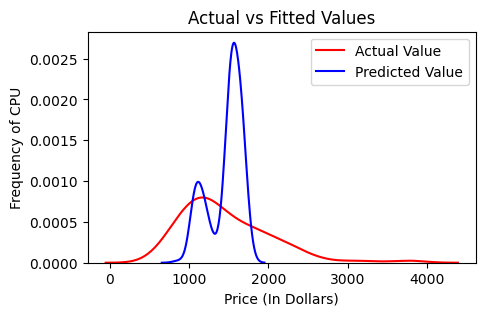

In [ ]:
# Write your code below and press Shift+Enter to execute 
width = 5
height = 3

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('Price (In Dollars)')
plt.ylabel('Frequency of CPU')
plt.legend(['Actual Value', 'Predicted Value'])

plt.show()
plt.close()

Evaluate the Mean Squared Error and R^2 score values for the model. 


In [ ]:
#Mean Squared Error
mse = mean_squared_error(df['Price'], Yhat)
print('MSE:', mse)

#R^2
print('R-Square:', lm.score(X, Y))


MSE: 284583.44058686297
R-Square: 0.13444363210243238


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [ ]:
# Option 1:
lm1 = LinearRegression()
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
lm1.fit(Z, df['Price'])
Y_hat = lm1.predict(Z)

# Option 2:
#lm1 = LinearRegression()
#Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
#lm1.fit(Z,Y)
#Y_hat = lm1.predict(Z)

Plot the Distribution graph of the predicted values as well as the Actual values


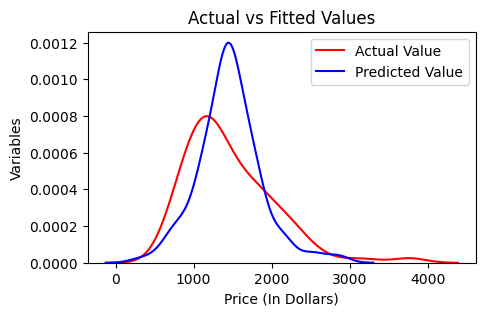

In [ ]:
# Write your code below and press Shift+Enter to execute
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('Price (In Dollars)')
plt.ylabel('Variables')
plt.legend(['Actual Value', 'Predicted Value'])

plt.show()
plt.close()


Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [ ]:
#Mean Squared Error
mse = mean_squared_error(df['Price'], Y_hat)
print('MSE:', mse)

#R^2
print('R-Square:', lm.score(Z, Y))


MSE: 161680.57263893107
R-Square: 0.5082509055187374


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [ ]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)


Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.figure(figsize=(width, height))
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


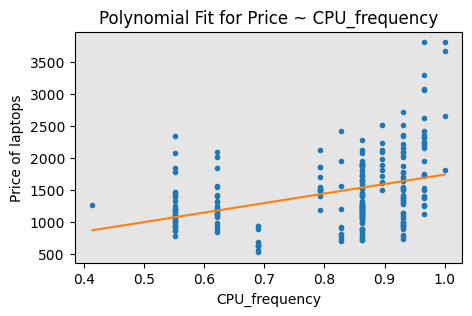

In [ ]:
# Call for function of degree 1
PlotPolly(p1, X, Y, 'CPU_frequency')

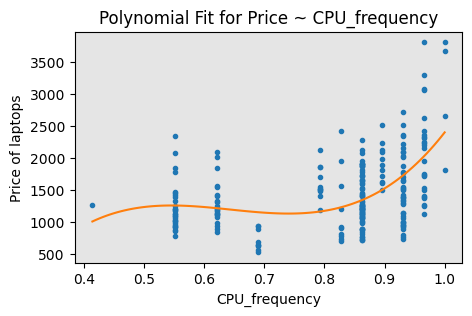

In [ ]:
# Call for function of degree 3
PlotPolly(p3, X, Y, 'CPU_frequency')

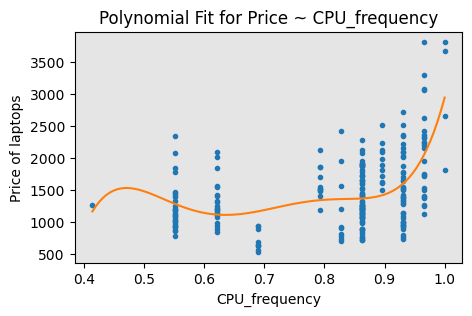

In [ ]:
# Call for function of degree 5
PlotPolly(p5, X, Y, 'CPU_frequency')

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [ ]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))

r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))

r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.13444363210243282
The MSE value for 1st degree polynomial is:  284583.4405868628
The R-square value for 3rd degree polynomial is:  0.26692640796530986
The MSE value for 3rd degree polynomial is:  241024.8630384881
The R-square value for 5th degree polynomial is:  0.3030822706443803
The MSE value for 5th degree polynomial is:  229137.29548053825


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [ ]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z, Y)
ypipe=pipe.predict(Z)

# You can call just an specific amount of results with the [0:X]
ypipe[0:3] 

Evaluate the MSE and R^2 values for the this predicted output.


In [ ]:
#Mean Squared Error: Option 1:
mse = mean_squared_error(df['Price'], ypipe)
print('MSE - Option 1:', mse)

#Mean Squared Error: Option 2:
print('MSE - Option 2:', mean_squared_error(Y, ypipe))

#R^2
print('R-Square:', r2_score(Y, ypipe))

MSE - Option 1: 244507.9894957983
MSE - Option 2: 244507.9894957983
R-Square: 0.2563325298426047
